In [1]:
from keras.layers import Input, Lambda,Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
IMAGE_SIZE = [224, 224]
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'

In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 31s 1us/step


In [18]:
for layer in vgg.layers:
    layer.trainable = False



In [23]:
# useful for getting number of Classes

folders = glob('../chest_xray/train/*')
folders

['../chest_xray/train\\NORMAL', '../chest_xray/train\\PNEUMONIA']

In [24]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation = 'softmax')(x)

In [25]:
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [26]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [28]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [29]:
training_set = train_datagen.flow_from_directory('../chest_xray/train', target_size=(224,224), batch_size=32, class_mode='categorical')
test_set = test_datagen.flow_from_directory('../chest_xray/test', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [30]:
# fit the model
r = model.fit_generator(training_set, validation_data=test_set, epochs=5, steps_per_epoch=len(test_set))

Epoch 1/5
20/20 [==============================] - 49s 2s/step - loss: 0.4223 - accuracy: 0.8281 - val_loss: 0.3536 - val_accuracy: 0.7965
Epoch 2/5
20/20 [==============================] - 29s 1s/step - loss: 0.1548 - accuracy: 0.9281 - val_loss: 0.4094 - val_accuracy: 0.8638
Epoch 3/5
20/20 [==============================] - 31s 2s/step - loss: 0.1100 - accuracy: 0.9609 - val_loss: 0.1927 - val_accuracy: 0.8990
Epoch 4/5
20/20 [==============================] - 33s 2s/step - loss: 0.1509 - accuracy: 0.9422 - val_loss: 0.5448 - val_accuracy: 0.9038
Epoch 5/5
20/20 [==============================] - 32s 2s/step - loss: 0.1485 - accuracy: 0.9375 - val_loss: 0.1015 - val_accuracy: 0.9038


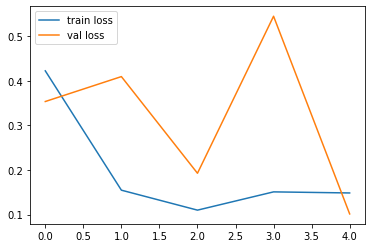

<Figure size 432x288 with 0 Axes>

In [32]:
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

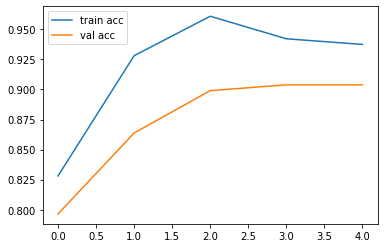

<Figure size 432x288 with 0 Axes>

In [35]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [39]:
model.save('../chest_xray/model_vgg16.h5')

In [38]:
import tensorflow as tf
from keras.models import load_model